In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.python.keras import Sequential


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 1us/step


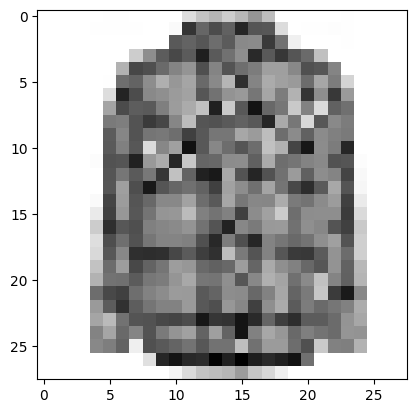

In [11]:
# print(f'IMAGE PIXEL ARRAY\n{training_images[0]}')
plt.imshow(training_images[32], cmap='Greys')

In [38]:
training_images=training_images/255.0
test_images=test_images/ 255.0

class mycallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nLoss is lower then 0.4 so cancelling training!")
            self.model.stop_training = True

    
callback = mycallBack()
    

In [42]:

model = Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    Dense(units = 512, activation = 'relu'),
    Dense(units =10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks = [callback] )

ValueError: Could not interpret optimizer identifier: <keras.optimizers.adam.Adam object at 0x0000029E00A02ED0>

In [40]:
model.evaluate(test_images, test_labels)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [23]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[0.09988122 0.1024802  0.09961388 0.10035797 0.10039196 0.09954226
 0.09988468 0.09990513 0.0995354  0.09840726]
9
